Loading of datasets**********
Train images shape: (700, 240, 240, 3)
Train labels shape: (700, 20)
Train images Type: <class 'numpy.ndarray'>
Train labels type: <class 'numpy.ndarray'>
Model modeling********************
58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 240, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 240, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 120, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 120,

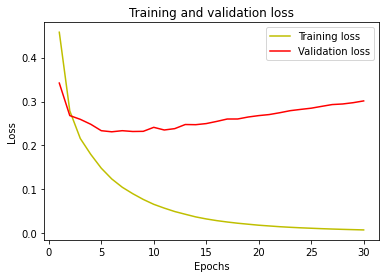

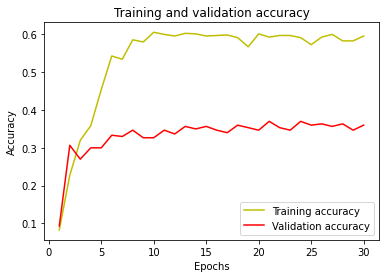

Predicting************
Predicted labels
[[2.16839666e-08 1.79012411e-03 1.45442311e-06 ... 3.78129675e-06
  2.66244314e-07 5.39277880e-06]
 [9.72415364e-06 1.78125780e-02 5.59091632e-06 ... 2.57601292e-04
  1.16489211e-03 4.04092607e-05]
 [6.95902796e-04 5.30971540e-03 5.94576821e-03 ... 1.36649664e-02
  6.84264749e-02 5.68914948e-05]
 ...
 [1.59548651e-02 2.73610116e-03 3.02341487e-03 ... 1.06234834e-01
  1.14776834e-04 1.13445342e-01]
 [2.26573277e-07 4.57180649e-09 3.05011017e-05 ... 2.17272773e-05
  8.93334402e-08 3.78307696e-08]
 [2.23810275e-06 1.79888318e-07 1.68559782e-04 ... 6.17720000e-03
  1.40869068e-08 1.76916437e-05]]

Original Labels
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


In [3]:
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

print('Loading of datasets**********')

input_image = np.load("/content/drive/MyDrive/DL_Project_files/image_data_new.npy",allow_pickle=True)

with open("/content/drive/MyDrive/DL_Project_files/final_labels.txt", "rb") as fp:   # Unpickling
    input_labels = pickle.load(fp)

input_image = input_image/255

input_labels = np.array(input_labels)




X_train, X_test, y_train, y_test = train_test_split(input_image, input_labels, random_state=20, test_size=0.3)


print('Train images shape:',X_train.shape)
print('Train labels shape:',y_train.shape)
print('Train images Type:',type(X_train))
print('Train labels type:',type(y_train))



print('Model modeling********************')
# if pretrained:
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(240, 240, 3)))
# else:
  # baseModel = VGG16(include_top=False, input_tensor=Input(shape=(240, 240, 3)))

headModel = baseModel.output # output of vgg model
headModel = Flatten(name="flatten")(headModel)  # Flatten layer
headModel = Dense(64, activation="relu")(headModel)  # First hidden layer
headModel = Dense(20, activation="softmax")(headModel)  # Output layer
# if pretrained:
for layer in baseModel.layers:
   layer.trainable = False

modelvgg = Model(inputs=baseModel.input, outputs=headModel)
modelvgg.summary()

modelvgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print('Training model**************')
historyvgg = modelvgg.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)
print('Training End*******')

print('Plotting the graphs now***********')
#plot the training and validation accuracy and loss at each epoch
loss = historyvgg.history['loss']
val_loss = historyvgg.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = historyvgg.history['accuracy']
val_acc = historyvgg.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#################################################
print('Predicting************')
y_predvgg = modelvgg.predict(X_test)
print('Predicted labels')
print(y_predvgg)
print()
print('Original Labels')
print(y_test)
################################################################









In [11]:
pred_class=[]
for classs, x in zip(class_names,y_test[0]):
  if x>0.8:
    pred_class.append(classs)

In [4]:
class_names = ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','dining table','dog','horse','motorbike','person','potted plant','sheep','sofa','train','tv/monitor']

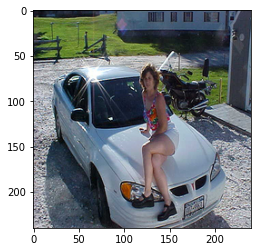

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_test[0])

In [12]:
pred_class

['bicycle', 'car', 'motorbike', 'person']